<a href="https://colab.research.google.com/github/Stecmds/Desafio-Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt

# #1. Análise do faturamento


In [5]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento_lojas_lista = []

def faturamento_lojas(parametro1):
  ''' Função que retorna o faturamento total de cada loja.

  parametro1: dataframe

  return faturamento: float

    Um float que representa o faturamento total de cada loja.
  '''
  faturamento = sum(parametro1['Preço'])
  return int(faturamento)

faturamento_lojas_lista.append(faturamento_lojas(loja))
faturamento_lojas_lista.append(faturamento_lojas(loja2))
faturamento_lojas_lista.append(faturamento_lojas(loja3))
faturamento_lojas_lista.append(faturamento_lojas(loja4))

print(faturamento_lojas_lista)

media_faturamento = sum(faturamento_lojas_lista) / len(faturamento_lojas_lista)
print(f'A média de faturamento é de {media_faturamento}')


[1534509, 1488459, 1464025, 1384497]
A média de faturamento é de 1467872.5


# 2. Vendas por Categoria


In [6]:
def qtd_categoria(parametro1):
  ''' Função que retorna a quantidade de vendas por categoria em ordem das categorias mais populares para as menos populares.

  parametro1: dataframe

  return total_vendas_ordenadas: dict
    Um dicionário onde as chaves são as categorias de produtos e os valores são as quantidades
    de vendas, ordenados do maior para o menor.
  '''
  categoria_loja = set(parametro1['Categoria do Produto'])
  total_vendas = {}
  for categoria in categoria_loja:
    quantidade = parametro1['Categoria do Produto'].value_counts()[categoria]
    total_vendas[categoria] = int(quantidade)
    total_vendas_ordenadas = dict(sorted(total_vendas.items(), key=lambda item: item[1], reverse=True))
  return total_vendas_ordenadas

resultado_loja = (qtd_categoria(loja))
resultado_loja2 = (qtd_categoria(loja2))
resultado_loja3 = (qtd_categoria(loja3))
resultado_loja4 = (qtd_categoria(loja4))
print(resultado_loja)
print(resultado_loja2)
print(resultado_loja3)
print(resultado_loja4)

{'moveis': 465, 'eletronicos': 448, 'brinquedos': 324, 'eletrodomesticos': 312, 'esporte e lazer': 284, 'instrumentos musicais': 182, 'livros': 173, 'utilidades domesticas': 171}
{'moveis': 442, 'eletronicos': 422, 'brinquedos': 313, 'eletrodomesticos': 305, 'esporte e lazer': 275, 'instrumentos musicais': 224, 'livros': 197, 'utilidades domesticas': 181}
{'moveis': 499, 'eletronicos': 451, 'brinquedos': 315, 'eletrodomesticos': 278, 'esporte e lazer': 277, 'livros': 185, 'instrumentos musicais': 177, 'utilidades domesticas': 177}
{'moveis': 480, 'eletronicos': 451, 'brinquedos': 338, 'esporte e lazer': 277, 'eletrodomesticos': 254, 'utilidades domesticas': 201, 'livros': 187, 'instrumentos musicais': 170}


In [14]:
cores = ['#7F55B1', '#9B7EBD', '#F49BAB', '#FFE1E0', '#A594F9', '#CDC1FF', '#E5D9F2', '#F5EFFF']

def vendas_categoria_grafico(parametro1, parametro2):
    ''' Função que cria um gráfico de barras com as vendas por categoria.

    parametro1: dict resultado_loja (inserir o número da loja desejada)
    parametro2: list lojas[] (inserir o índice da loja desejada)

    return plt.show()
    Retornará um gráfico de barras com as vendas por categoria.
    '''
    categorias = list(parametro1.keys())
    vendas = list(parametro1.values())

    plt.figure(figsize=(8, 5))
    plt.bar(categorias, vendas, color=cores[:len(categorias)])  # usa só as cores necessárias
    plt.title(f'Vendas por Categoria {parametro2}')
    plt.xlabel('Categoria')
    plt.ylabel('Vendas')
    plt.xticks(rotation=45)  # gira os rótulos para melhor leitura, se necessário
    plt.tight_layout()
    return plt.show()

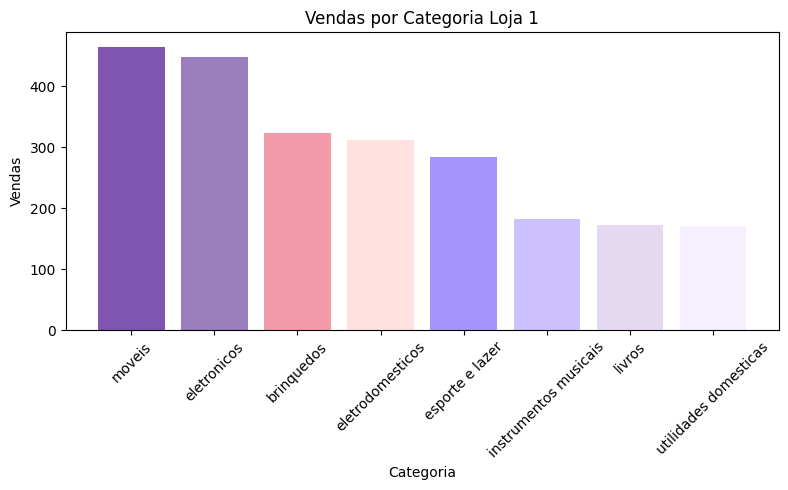

In [15]:
vendas_categoria_grafico(resultado_loja, lojas[0])


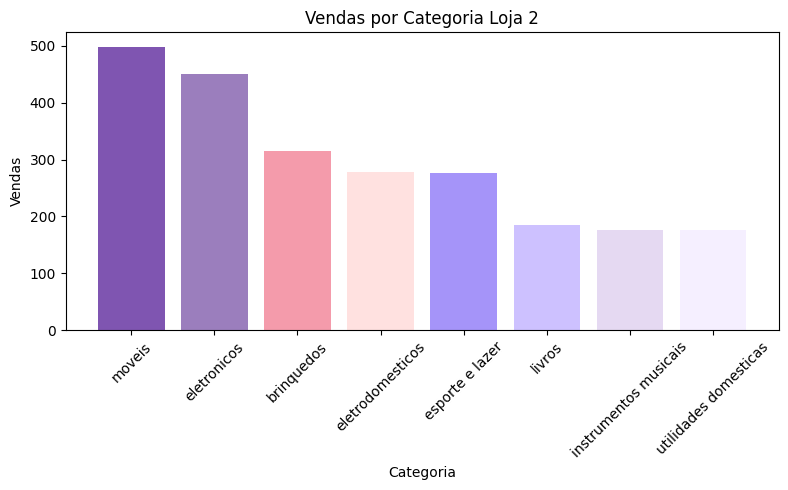

In [17]:
vendas_categoria_grafico(resultado_loja3, lojas[1])


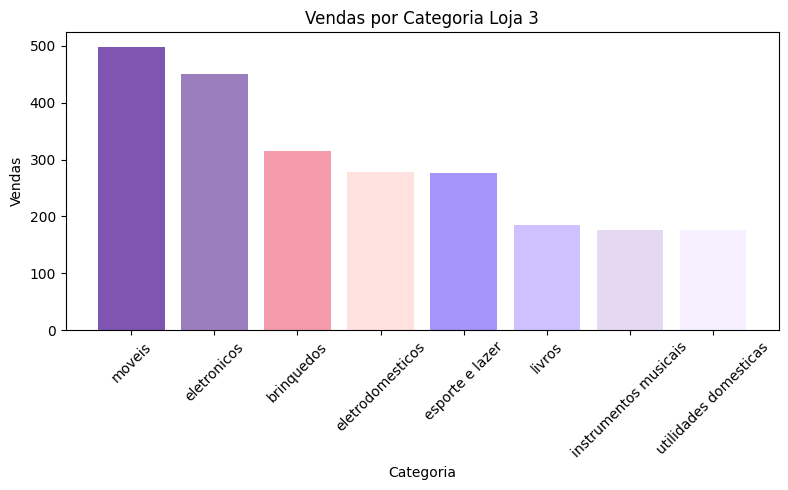

In [18]:
vendas_categoria_grafico(resultado_loja3, lojas[2])


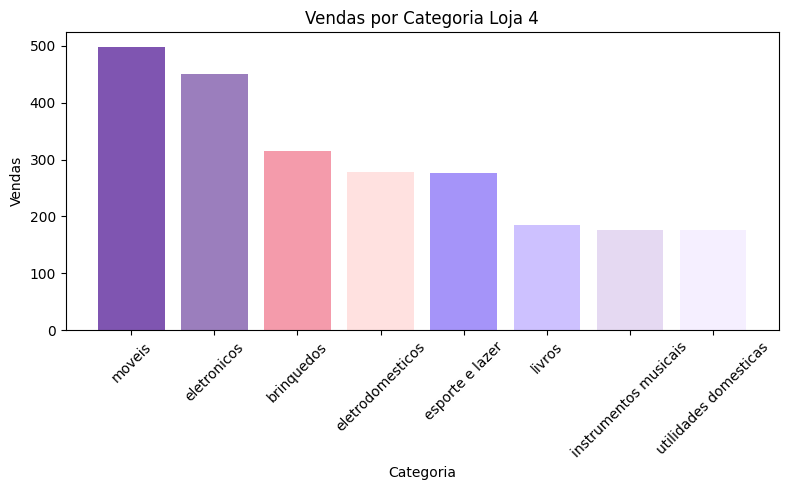

In [19]:
vendas_categoria_grafico(resultado_loja3, lojas[3])


# 3. Média de Avaliação das Lojas

In [11]:
media_avaliacoes_lista = []

def media_avaliacoes(parametro1):
  ''' Função que retorna a média de avaliação das lojas.

  parametro1: dataframe

  return media: float
    Um float que representa a média de avaliação das lojas.
  '''
  soma_avaliações = sum(parametro1['Avaliação da compra'])
  media = soma_avaliações / len(parametro1['Avaliação da compra'])
  return round(media, 2)

media_avaliacoes_lista.append(media_avaliacoes(loja))
media_avaliacoes_lista.append(media_avaliacoes(loja2))
media_avaliacoes_lista.append(media_avaliacoes(loja3))
media_avaliacoes_lista.append(media_avaliacoes(loja4))

print(media_avaliacoes_lista)
media_avaliacoes_geral = sum(media_avaliacoes_lista) / len(media_avaliacoes_lista)
print(f'A média de avaliação geral é de {media_avaliacoes_geral}')

[3.98, 4.04, 4.05, 4.0]
A média de avaliação geral é de 4.0175


# 4. Produtos Mais e Menos Vendidos

In [12]:
def popularidade_produtos(parametro1, parametro2):
  ''' Função que retorna o produto mais e menos vendido de cada loja.

  parametro1: dict resultado_loja (inserir o número da loja desejada)
  parametro2: list lojas[] (inserir o indice da loja desejada)

  return print
  '''
  produto_mais_vendido = max(parametro1, key=parametro1.get)
  produto_menos_vendido = min(parametro1, key=parametro1.get)

  print(f'Produto mais vendido {parametro2}: {produto_mais_vendido} com {parametro1[produto_mais_vendido]} vendas.')
  print(f'Produto menos vendido {parametro2}: {produto_menos_vendido} com {parametro1[produto_menos_vendido]} vendas.\n')

popularidade_produtos(resultado_loja, lojas[0])
popularidade_produtos(resultado_loja2, lojas[1])
popularidade_produtos(resultado_loja3, lojas[2])
popularidade_produtos(resultado_loja4, lojas[3])

Produto mais vendido Loja 1: moveis com 465 vendas.
Produto menos vendido Loja 1: utilidades domesticas com 171 vendas.

Produto mais vendido Loja 2: moveis com 442 vendas.
Produto menos vendido Loja 2: utilidades domesticas com 181 vendas.

Produto mais vendido Loja 3: moveis com 499 vendas.
Produto menos vendido Loja 3: instrumentos musicais com 177 vendas.

Produto mais vendido Loja 4: moveis com 480 vendas.
Produto menos vendido Loja 4: instrumentos musicais com 170 vendas.



# 5. Frete Médio por Loja


In [13]:
frete_medio_lista = []
def frete_medio(parametro1):
  ''' Função que retorna o frete médio de cada loja.

  parametro1: dataframe

  return media: float
    Um float que representa o frete médio de cada loja.
  '''
  soma_frete = sum(parametro1['Frete'])
  media = soma_frete / len(parametro1['Frete'])
  return round(media, 2)

frete_medio_lista.append(frete_medio(loja))
frete_medio_lista.append(frete_medio(loja2))
frete_medio_lista.append(frete_medio(loja3))
frete_medio_lista.append(frete_medio(loja4))

print(frete_medio_lista)

[34.69, 33.62, 33.07, 31.28]


Relatório Final

O objetivo do desafio é analisar dados das quatro lojas de Seu João e identificar qual loja tem menor desempenho e portanto deve ser a escolhida para ser vendida. Vamos analisar juntos, passo-a-passo.

Faturamento Total das Lojas

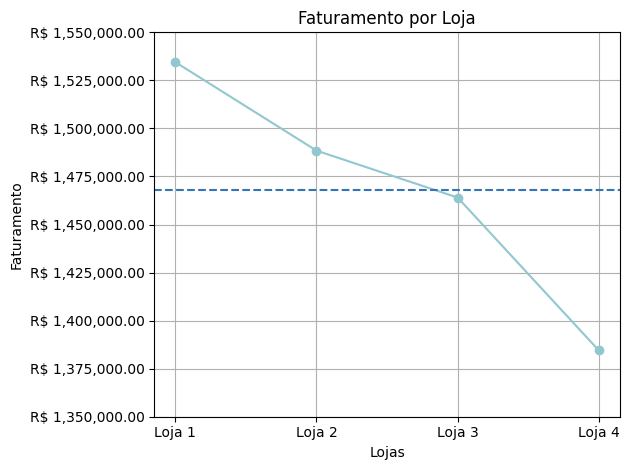

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.plot(lojas, faturamento_lojas_lista, marker='o', linestyle='-', color='#92C7CF')
plt.axhline(y=media_faturamento, color='#3674B5', linestyle='--')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')

def formato_real(x, pos):
    return f'R$ {x:,.2f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_real))
plt.ylim(1350000, 1550000)
plt.grid(True)
plt.tight_layout()
plt.show()




> O gráfico mostra o faturamento total por loja. A Loja 1 teve o melhor desempenho, enquanto a Loja 4 teve o pior, ficando bem abaixo da média representada pela linha pontilhada. As Lojas 3 e 4 estão abaixo da média de faturamento.



## Média de Avaliações


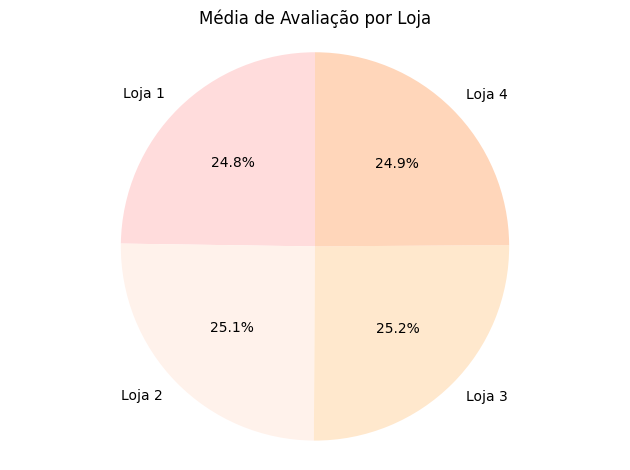

In [24]:

plt.pie(media_avaliacoes_lista, labels=lojas, autopct='%1.1f%%', colors=['#FFDCDC', '#FFF2EB', '#FFE8CD', '#FFD6BA']*len(lojas), startangle=90)
plt.title('Média de Avaliação por Loja')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Frete Médio


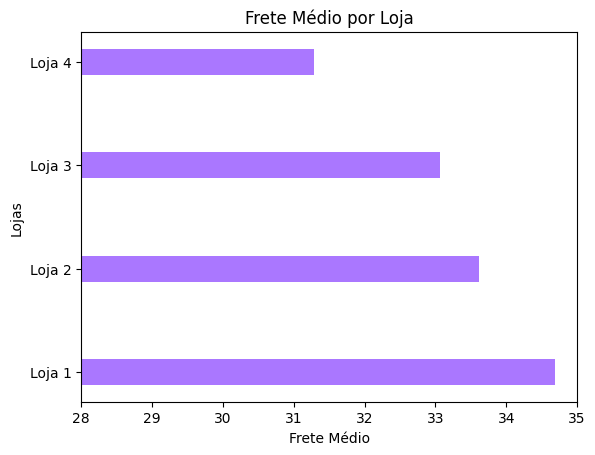

In [25]:

plt.barh(lojas, frete_medio_lista, color = '#AA77FF', height = 0.25)
plt.xlabel('Frete Médio')
plt.ylabel('Lojas')
plt.title('Frete Médio por Loja')
plt.xlim(28, 35)
plt.show()

# Conclusão



A Loja 4 apresenta o menor faturamento entre todas as lojas analisadas, ficando significativamente abaixo da média geral. Além disso, sua média de avaliações também está abaixo da média, e embora supere levemente a Loja 1 nesse quesito, a diferença é pequena e pouco relevante para a análise.

Por outro lado, a Loja 4 se destaca positivamente no valor do frete, sendo o mais baixo entre as lojas, enquanto a Loja 1 possui o frete mais alto.

Os gráficos de vendas por categoria e dos produtos mais e menos vendidos não trazem grandes diferenciais, já que as lojas apresentam desempenhos semelhantes nesses aspectos.

Diante disso, a análise dos gráficos e dados complementares indica que a Loja 4 possui a performance mais fraca, principalmente em termos de faturamento. Mesmo com frete competitivo e leve vantagem em algumas categorias, esses fatores não se traduzem em melhores resultados financeiros. Portanto, a Loja 4 é a opção mais adequada para o Seu João iniciar seu novo negócio, oferecendo potencial de melhoria e oportunidade de investimento.